# This is Heart Disease Prediction Project
### We are going to predict on the data whether the patient have the heart disease or not


## Steps We are Going to Follow
 1. Problem Definition
 2. Data
 3. Evaluation
 4. Featuring
 5. Modeling
 6. Experimentations

# 1. Problem Definition
> Based on the given data we need to predict if a patient has heart disease or not

# 2. Data
> We have the data and have loaded it

# 3. Evaluate
> In initial stages we need to make sure that our model give us the accuracy of 95%.

# 4. Featuring 
> What features are important, what features columns means what

age = age in years

sex = (1 = male; 0 = female)

cp = chest pain type

trestbps = resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl

fbs = (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg = resting electrocardiographic results

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target = 1 or 0

# Tools Preparation

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Exploring the Data initial stage
1. What problem I am going to solve?
2. What kind of data I have?
3. Does this data have missing values?
4. Are there any outliers, sporious vectors?
5. Can we add or remove some of the features?

# Read the dataset

In [ ]:
df = pd.read_csv('heart.csv') 

# Information about no of rows and columns

In [2]:
df.shape 

(1025, 14)

# First few rows of the data

In [3]:
df.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Last few rows of the data

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Exploring the target(to be predicted) column

In [5]:
df['target'].value_counts() # 1 means have a disease

target
1    526
0    499
Name: count, dtype: int64

# Ploting the target column

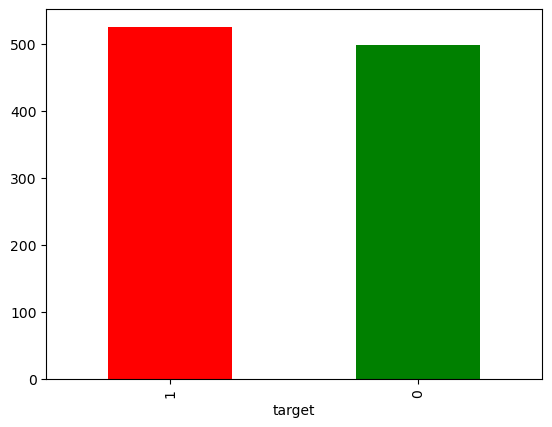

In [6]:
df['target'].value_counts().plot(kind='bar', color=['red', 'green']);

# Are there any missing values?

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Statistics of the data

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Statistics of the sex column

In [9]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

# How many have disease and how many have not(for both)

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

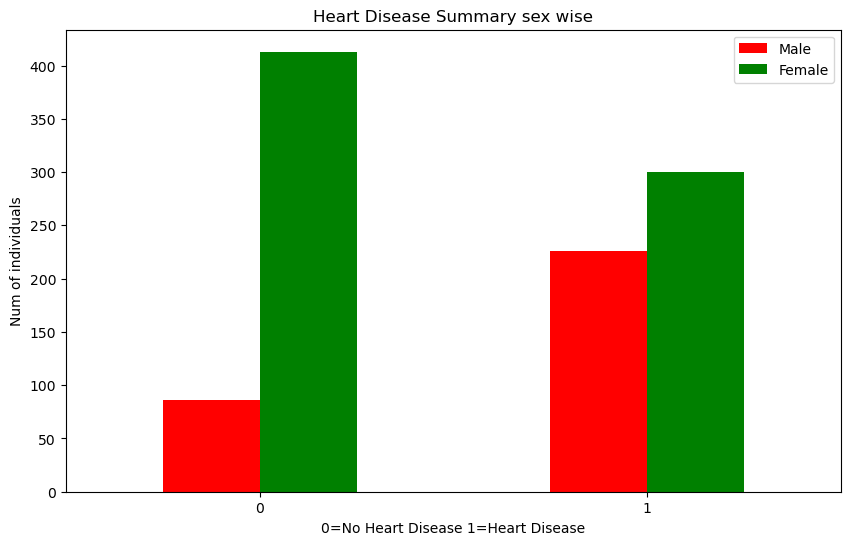

In [11]:
# ploting the above ratio
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color = ['red', 'green'])
plt.title('Heart Disease Summary sex wise')
plt.xlabel('0=No Heart Disease 1=Heart Disease')
plt.ylabel('Num of individuals')
plt.legend(["Male", "Female"])
plt.xticks(rotation=0)

# Finding the pattern using scatter plot

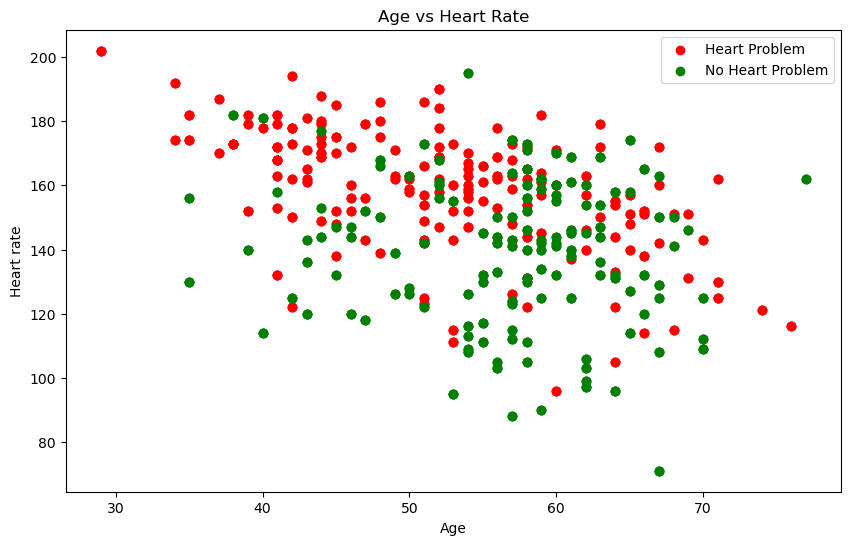

In [12]:
plt.figure(figsize=(10, 6))

# create scatter plot
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="red");
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="green");
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(['Heart Problem', 'No Heart Problem'])

# Histogram to see age distribution

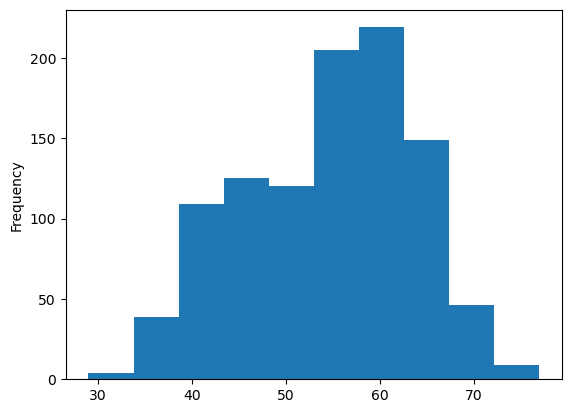

In [13]:
df.age.plot.hist();

# Exploring the cp(chest pain) column

In [14]:
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

cp: chest pain type
1. -- value 0: typical angina
2. -- value 1: atypical angina
3. -- value 2: non-anginal pain
4. -- value 3: asymptomatic

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


# Making the bar chart of chest pain vs target

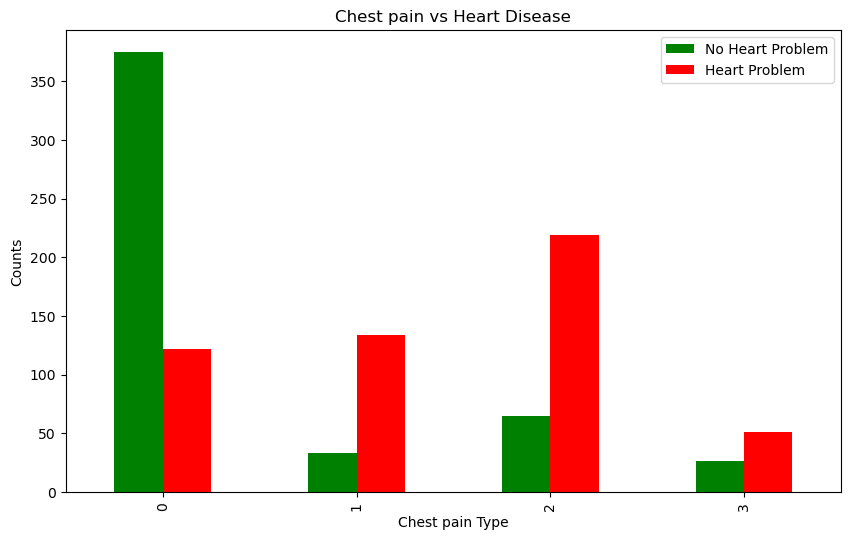

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize = (10, 6),
                                  color=['green', 'red'])

# Description of the chart
plt.title('Chest pain vs Heart Disease')
plt.xlabel('Chest pain Type')
plt.ylabel('Counts')
plt.legend(['No Heart Problem', 'Heart Problem']);

# Correlation Matrix

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


# Plotting the correlation matrix(map)

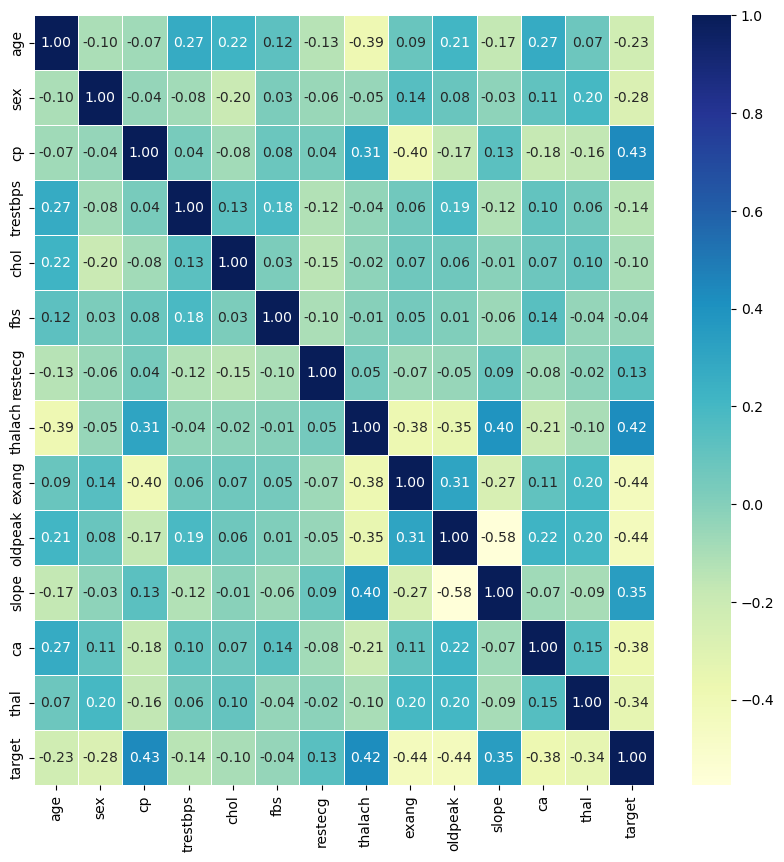

In [18]:
cor_map = df.corr()
fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.heatmap(cor_map,
                annot=True,
                linewidths=0.5,
                fmt='0.2f',
                cmap="YlGnBu");

# Modeling

In [19]:
X = df.drop('target', axis=1) # features without 'target' column
y = df['target']

In [20]:
# Using Random seed, so that other could produce the same result
np.random.seed(7)

# Split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
len(X)

1025

In [22]:
len(X_train)

820

# The Models we are going to Use
1. K-nearest Neighbours Classifiers
2. Random Forest Classifier
3. Logistric Regression

In [23]:
# Putting the models into a dictionary
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Funtion to evaluate the Models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(7)
    # make a Dictionary to score the model
    model_score = { }
    # looping through
    for name, model in models.items():
        model.fit(X_train, y_train)
        # evaluate the model and append it's score
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [24]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7463414634146341,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8780487804878049}

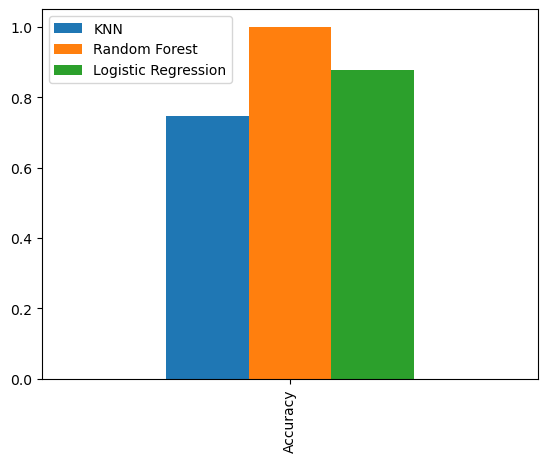

In [25]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.plot.bar();

# Improve Model and Tunning the Model

## Universal Method used for all classification problems
* HyperParameter Tunning
* Features Improving

## Advanced Level
 * Confusion_Matrix
 * Cross_Validation
 * Precision
 * Recall
 * F1
 * Classification Report
 * ROC Curve

# Method 1
## Universal Method 
* HyperParameter Tunning
* Features Improving

In [26]:
# 
train_score = []
tests_score = []

# Create range to be test for n_neighbors
nNeighbors = range(1, 30)

# KNN instance
KNN = KNeighborsClassifier()

# Looping through the range
for i in nNeighbors:
    KNN.set_params(n_neighbors=i)
    
    # Run the fit for ith value
    KNN.fit(X_train, y_train)
    
    # Update the Training score
    train_score.append(KNN.score(X_train, y_train))
    
    # Update the test score list
    tests_score.append(KNN.score(X_test, y_test))



In [27]:
train_score

[1.0,
 0.9951219512195122,
 0.9902439024390244,
 0.9451219512195121,
 0.9182926829268293,
 0.8219512195121951,
 0.7951219512195122,
 0.7914634146341464,
 0.75,
 0.775609756097561,
 0.774390243902439,
 0.7560975609756098,
 0.7536585365853659,
 0.7353658536585366,
 0.751219512195122,
 0.7658536585365854,
 0.7621951219512195,
 0.7463414634146341,
 0.7329268292682927,
 0.7329268292682927,
 0.7292682926829268,
 0.7341463414634146,
 0.7414634146341463,
 0.7378048780487805,
 0.7463414634146341,
 0.7341463414634146,
 0.7414634146341463,
 0.7402439024390244,
 0.7451219512195122]

Max KNN Score: 98.05%


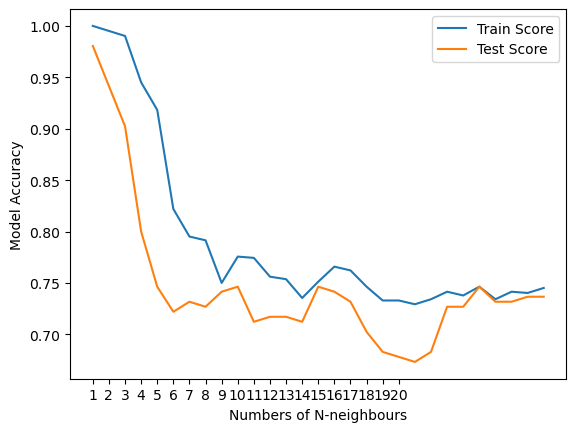

In [28]:
# Plot the Accuracy Score
plt.plot(nNeighbors, train_score, label="Train Score")
plt.plot(nNeighbors, tests_score, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Numbers of N-neighbours")
plt.ylabel("Model Accuracy")
plt.legend()
print(f"Max KNN Score: {max(tests_score)*100:0.2f}%")

# Hyperparameter tunning using Randomoized Search CV
* LogisticRegression
* RandomForestClassifier

In [29]:
# Dictionary of hyper-parameters for LogisticRegression()
LR_hp = { 
    "C": np.logspace(-4, 4, 20),
    "solver": ['liblinear']
}

# Dictionary of hyper-parameters for RandomForestClassifier()
RFC_hp = {
    "n_estimators": np.arange(10, 1600, 100),
    "max_depth": [None, 3, 5, 6, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [30]:
# Tune Logistic Regression
np.random.seed(7)
# let Use RSCV to tune HP
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv = 5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP search model for LR
lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
lr.score(X_test, y_test)

0.8682926829268293

In [32]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
# Tune Random Forest Classifier
np.random.seed(7)
# let Use RSCV to tune HP
rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv = 5,
                       n_iter=20,
                       verbose=True)
# Fit the random HP search model for RFC
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [35]:
rfc.score(X_test, y_test)

0.9317073170731708

In [36]:
rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 6}

# Accuracy comparison before and after tunning hyper-parameters using RSCV
* 'KNN': Before = 0.7463 and After = 0.9805
* 'Random Forest': Before = 1.0 and After = 0.9317
* 'Logistic Regression': 0.8780 and After = 0.8683

# Hyperparameter using Grid Search CV

In [37]:
# Tune Logistic Regression
np.random.seed(7)

# let Use GSCV to tune HP
lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv = 5,
                       verbose=True)

# Fit the random HP search model for LR
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
lr_gs.score(X_train, y_train)

0.8451219512195122

In [39]:
lr_gs.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [42]:
# Tune Random Forest Classifier
np.random.seed(7)

# Dictionary of hyper-parameters for RandomForestClassifier()
# reduce no of hyper parameters for simplicity
RFC2_hp = {
    "n_estimators": np.arange(1, 101, 50),
    "max_depth": [None, 3, 50],
    "min_samples_split": np.arange(2, 8, 2),
    "min_samples_leaf": np.arange(1, 7, 2)
}

# let Use GSCV to tune HP
rfc_gs = GridSearchCV(RandomForestClassifier(),
                       param_grid=RFC2_hp,
                       cv = 5,
                       verbose=True)

# Fit the random HP search model for LR
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([ 1, 51])},
             verbose=True)

In [44]:
rfc_gs.score(X_test, y_test)

0.9902439024390244

In [45]:
rfc_gs.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 51}

# Accuracy comparison before and after tunning hyper-parameters using GSCV
* 'KNN': Before = 0.7463 and After = 0.9805
* 'Random Forest': Before = 1.0 and After = 0.9902
* 'Logistic Regression': 0.8780 and After = 0.8451

# Now working on Advance Level
* ROC Curve
* Confusion_Matrix
 * Precision
 * Recall
 * F1
 * Classification Report
 * ROC Curve

# Plotting the Area Under the Curve

In [62]:
#create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#fit the model
lr_gs.fit(X_train, y_train)

#predicting proba
y_proba = lr_gs.predict_proba(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [63]:
y_proba[:5], y_test[:5] 

#positive only
y_prob_positive = y_proba[:,1]
y_prob_positive

array([0.08371348, 0.04128688, 0.90572073, 0.52122581, 0.86882206,
       0.02150853, 0.64265812, 0.93643284, 0.11630826, 0.85555869,
       0.02476705, 0.1015481 , 0.14914253, 0.96780307, 0.82503556,
       0.74887022, 0.6662548 , 0.87092017, 0.89989932, 0.04702132,
       0.0087515 , 0.52122581, 0.6777991 , 0.54520633, 0.54017765,
       0.83563903, 0.55101472, 0.00351895, 0.03765247, 0.98784057,
       0.92144285, 0.98583462, 0.92814738, 0.00276234, 0.81983912,
       0.05459826, 0.09174778, 0.04405075, 0.75281395, 0.68595755,
       0.10627901, 0.03292016, 0.58144962, 0.82436377, 0.96339255,
       0.03972061, 0.99247897, 0.58177356, 0.82538052, 0.09934158,
       0.96877032, 0.0047716 , 0.04702132, 0.94769745, 0.98784057,
       0.05768516, 0.22360517, 0.86934474, 0.05725777, 0.23334566,
       0.55845763, 0.81030285, 0.80924762, 0.03765247, 0.60765138,
       0.93819179, 0.77735862, 0.70773812, 0.5768231 , 0.81520484,
       0.81030285, 0.0058923 , 0.38963505, 0.11630826, 0.19929

In [64]:
#calculate fpr, tpr, and threshold
fpr, tpr, threshold = roc_curve(y_test, y_prob_positive)

In [65]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00952381, 0.00952381,
       0.00952381, 0.00952381, 0.00952381, 0.00952381, 0.00952381,
       0.00952381, 0.01904762, 0.01904762, 0.03809524, 0.04761905,
       0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905,
       0.05714286, 0.05714286, 0.05714286, 0.05714286, 0.05714286,
       0.05714286, 0.05714286, 0.05714286, 0.05714286, 0.05714286,
       0.07619048, 0.07619048, 0.08571429, 0.1047619 , 0.1047619 ,
       0.11428571, 0.11428571, 0.11428571, 0.11428571, 0.11428571,
       0.11428571, 0.13333333, 0.13333333, 0.13333333, 0.15238095,
       0.15238095, 0.18095238, 0.18095238, 0.2       , 0.2       ,
       0.20952381, 0.22857143, 0.25714286, 0.25714286, 0.28571429,
       0.28571429, 0.28571429, 0.3047619 , 0.32380952, 0.34285714,
       0.35238095, 0.38095238, 0.4       , 0.41904762, 0.43809524,
       0.43809524, 0.45714286, 0.47619048, 0.51428571, 0.6    

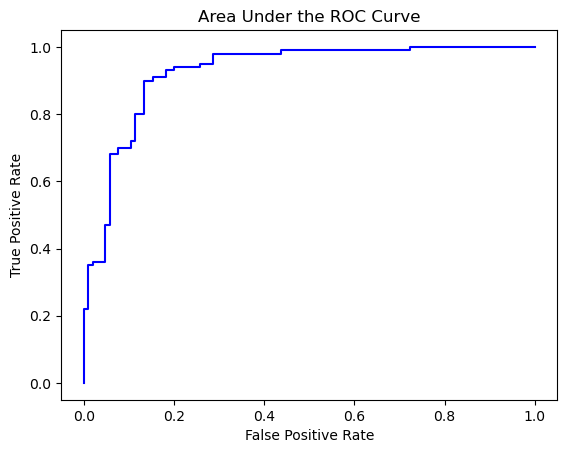

In [66]:
# create a function for plotiing using matplot lib

def plot_roc(fpr, tpr):
    
    #plot roc curve
    plt.plot(fpr, tpr, color = 'blue', label = "Auc")
    
    #customise
    plt.title("Area Under the ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend
    plt.show


plot_roc(fpr, tpr)

In [67]:
# score
roc_auc_score(y_test, y_prob_positive)

0.9253333333333333

# Confusion Matrix

In [69]:
y_preds = lr_gs.predict(X_test)
print(confusion_matrix(y_test, y_preds))

[[81 24]
 [ 6 94]]


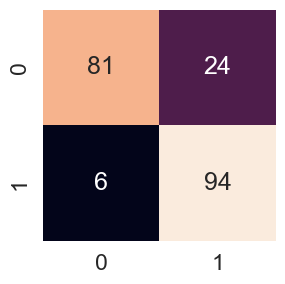

In [71]:
sns.set(font_scale=1.5)

def plot_confusion(y_test, y_preds):
    """This will plot the confusion matrix"""
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    
plot_confusion(y_test, y_preds)

# Classification report

In [75]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       105
           1       0.80      0.94      0.86       100

    accuracy                           0.85       205
   macro avg       0.86      0.86      0.85       205
weighted avg       0.87      0.85      0.85       205



# Trying Cross Validation if it helps in improving

In [88]:
lr_gs.best_params_
lr = LogisticRegression(C = 1.623776739188721,
                        solver = 'liblinear')

# Cross validated Accuracy

In [79]:
cv_accuracy = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8448287338418732

# Cross validated Precision

In [80]:
cv_precision = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8173379340661772

# Cross validated Recall

In [81]:
cv_recall = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring="recall")
cv_recall = np.mean(cv_accuracy)
cv_recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8448287338418732

# Cross validated F1-score

In [82]:
cv_f1 = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8559661490334498

# Visualizing the Cross Validated Matrices

<Axes: title={'center': 'Comparision of the Matrices'}>

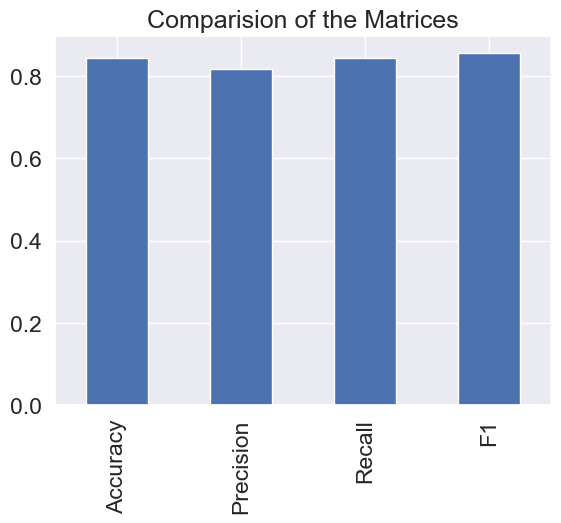

In [84]:
cv_plot = pd.DataFrame({
    "Accuracy" : cv_accuracy,
    "Precision" : cv_precision,
    "Recall" : cv_recall,
    "F1" : cv_f1
}, index=[0])
cv_plot.T.plot.bar(title = "Comparision of the Matrices",
                legend = False)

# Features Improving

In [85]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [89]:
# Checking the coefficient function (how much the features is related with the target)
lr.fit(X_train, y_train)
lr.coef_ 

array([[ 0.00688398, -1.71121734,  0.89079413, -0.01348149, -0.00526788,
        -0.15853965,  0.49216865,  0.02741734, -0.85195804, -0.52317774,
         0.55906902, -0.69242268, -0.74093767]])

In [91]:
# how much the each feature is related with the target
final_coef = dict(zip(df.columns, list(lr.coef_[0])))
final_coef

{'age': 0.0068839766186760305,
 'sex': -1.7112173385299234,
 'cp': 0.8907941304891202,
 'trestbps': -0.013481490239485925,
 'chol': -0.005267875422262576,
 'fbs': -0.1585396521697605,
 'restecg': 0.49216865155346895,
 'thalach': 0.02741734257913483,
 'exang': -0.8519580412963942,
 'oldpeak': -0.5231777428314209,
 'slope': 0.5590690165802589,
 'ca': -0.6924226760030846,
 'thal': -0.7409376650292449}

<Axes: title={'center': 'Features Importance'}>

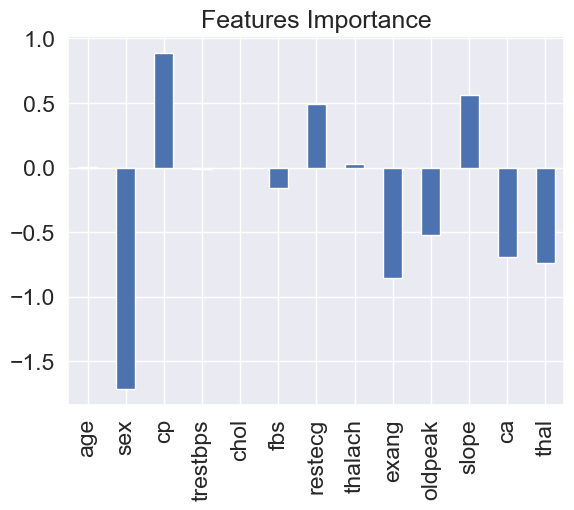

In [93]:
# plotting
features = pd.DataFrame(final_coef, index=[0])
features.T.plot.bar(title="Features Importance",
                    legend = False)

# Conclusion

In [ ]:
* We set 95% accuracy goal, but we did not meet(in LogisticRegression)
  We can Ask Questions:
* What if we try to get more data?
* What if we try to improve the quality of the data?
* What if we try to use models and see if there is any improvements?